In [1]:
using CUDD # import the CUDD library

In [2]:
manager = initialize_cudd() # creates the DD manager that manages the nodes and operations

Ptr{CUDD.Manager} @0x00007fbe1ae75c00

In [3]:
# The following shows how to create an ADD of the function f = x1x2 

In [4]:
x1 = add_var(manager) # creates the first variable

Ptr{CUDD.Node} @0x00007fbe1a3ffec0

In [5]:
ref(x1) # IMPORTANT: update the reference count for the node just created

In [6]:
x2 = add_var(manager) # creates the second variable

Ptr{CUDD.Node} @0x00007fbe1a3fff00

In [7]:
ref(x2) # Again, update the reference count for x2

In [8]:
f = add_apply(manager, add_plus_c, x1, x2)

Ptr{CUDD.Node} @0x00007fbe1a3fff60

In [9]:
deref(x1) # ALSO IMPORTANT: decrement the reference count for the old node

In [10]:
deref(x2)

In [11]:
ref(f)

In [12]:
# Now, to see the ADD that has been created, we can output it as a DOT file

In [13]:
output_dot(manager, f, "plus_example.dot")

1

In [14]:
# Now to visualize the DOT file that was just created, you'll need GraphViz installed on your computer

In [15]:
run(`dot -Tpng plus_example.dot -o plus_example.png`)

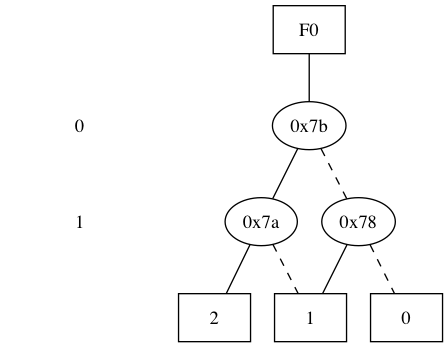

In [16]:
display("image/png", read("plus_example.png"))

In [17]:
# The following shows a slightly more complicated example where we create the function f = 5x0x1x2x3

In [18]:
manager2 = initialize_cudd()

Ptr{CUDD.Manager} @0x00007fbe1b1f1e00

In [19]:
g = add_const(manager2, 5);

In [20]:
ref(g)

In [21]:
for i in [0,1,2,3]
    var = add_ith_var(manager2, i)
    ref(var)
    tmp = add_apply(manager2, add_times_c, g, var)
    ref(tmp)
    recursive_deref(manager2, g)
    recursive_deref(manager2, var)
    g = tmp
end

In [22]:
output_dot(manager2, g, "times_example.dot")

1

In [23]:
run(`dot -Tpng times_example.dot -o times_example.png`)

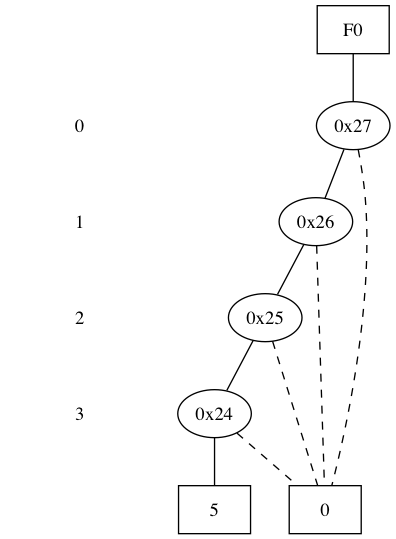

In [24]:
display("image/png", read("times_example.png"))